In [ ]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2646016/45929032 bytes (5.8%)6209536/45929032 bytes (13.5%)9584640/45929032 bytes (20.9%)13058048/45929032 bytes (28.4%)16564224/45929032 bytes (36.1%)20094976/45929032 bytes (43.8%)23379968/45929032 bytes (50.9%)26976256/45929032 bytes (58.7%)30433280/45929032 bytes (66.3%)33792000/45929032 bytes (73.6%)37257216/45929032 bytes (81.1%)40804352/45929032 bytes (88.8%)

In [ ]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shooting (10).jpg
Dribble (46).jpg


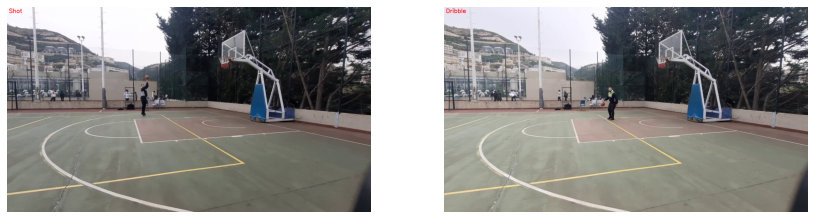

In [ ]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir('/content/drive/MyDrive/frames')

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 2)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'/content/drive/MyDrive/frames/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    print(selected_video_file_name)

    # # Converting the BGR Frame to RGB Frame 
    # rgb_frame = cv2.cvtColor(selected_video_file_name, cv2.COLOR_BGR2RGB)

    # # Adding The Class Name Text on top of the Video Frame.
    
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    img = mpimg.imread(f'/content/drive/MyDrive/frames/{selected_class_Name}/{selected_video_file_name}')
    cv2.putText(img, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis('off')

In [ ]:
image_height, image_width = 64, 64
max_images_per_class = 200

dataset_directory = "/content/drive/MyDrive/frames"
classes_list = ["Shot", "Dribble"]

model_output_size = len(classes_list)

In [ ]:
from PIL import Image

In [ ]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    frames_list = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for frame_name in files_list:

            # Construct the complete video path
            frame_file_path = os.path.join(dataset_directory, class_name, frame_name)

            cur_frame = cv2.imread(frame_file_path)

            cur_frame = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2RGB)

            # Resize the Frame to fixed Dimensions
            resized_frame = cv2.resize(cur_frame, (image_height, image_width))
            
            # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
            normalized_frame = resized_frame / 255
            
            # Appending the normalized frame into the frames list
            frames_list.append(normalized_frame)

        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)

    # Converting the features and labels lists to numpy arrays
    features = np.asarray(frames_list)
    labels = np.array(labels)  

    return features, labels

In [ ]:
features, labels = create_dataset()

Extracting Data of Class: Shot
Extracting Data of Class: Dribble


In [ ]:
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [ ]:
# Let's create a function that will construct our model
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                        

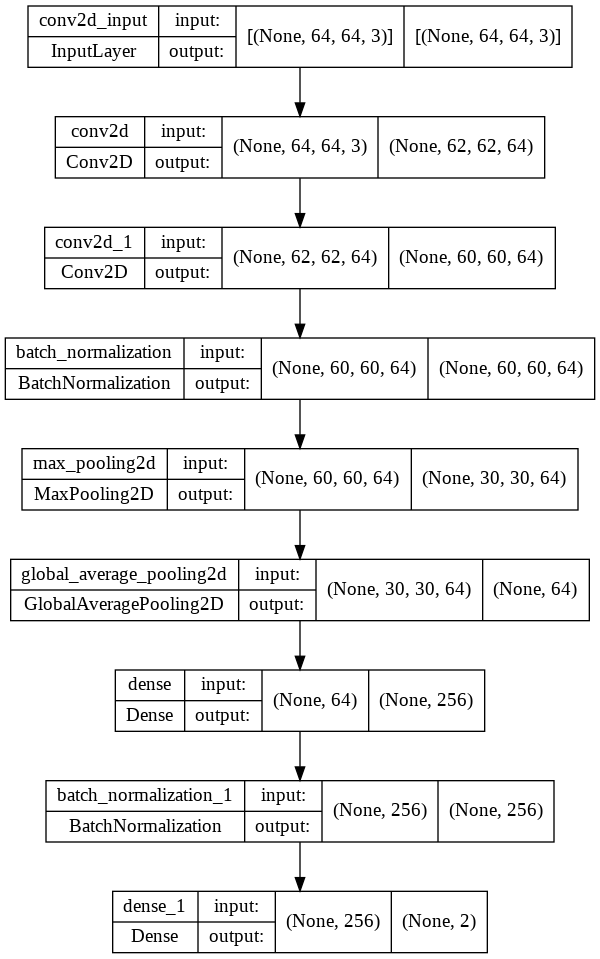

In [ ]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# Adding the Early Stopping Callback to the model which will continuously monitor the validation loss metric for every epoch.
# If the models validation loss does not decrease after 15 consecutive epochs, the training will be stopped and the weight which reported the lowest validation loss will be retored in the model.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ["binary_accuracy"])

# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/50
64/64 [==============================] - 12s 20ms/step - loss: 0.4387 - binary_accuracy: 0.8125 - val_loss: 0.6941 - val_binary_accuracy: 0.4375
Epoch 2/50
64/64 [==============================] - 1s 15ms/step - loss: 0.3480 - binary_accuracy: 0.8281 - val_loss: 0.6863 - val_binary_accuracy: 0.4375
Epoch 3/50
64/64 [==============================] - 1s 15ms/step - loss: 0.3149 - binary_accuracy: 0.8516 - val_loss: 0.6670 - val_binary_accuracy: 0.9688
Epoch 4/50
64/64 [==============================] - 1s 15ms/step - loss: 0.2945 - binary_accuracy: 0.8789 - val_loss: 0.9089 - val_binary_accuracy: 0.4375
Epoch 5/50
64/64 [==============================] - 1s 15ms/step - loss: 0.2677 - binary_accuracy: 0.8906 - val_loss: 0.9699 - val_binary_accuracy: 0.4375
Epoch 6/50
64/64 [==============================] - 1s 15ms/step - loss: 0.2179 - binary_accuracy: 0.9102 - val_loss: 0.8695 - val_binary_accuracy: 0.5625
Epoch 7/50
64/64 [==============================] - 1s 15ms/step - lo

In [ ]:
model_evaluation_history = model.evaluate(features_test, labels_test)

3/3 [==============================] - 1s 76ms/step - loss: 0.6633 - binary_accuracy: 0.9625


In [ ]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Saving your Model
model.save(model_name)

In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

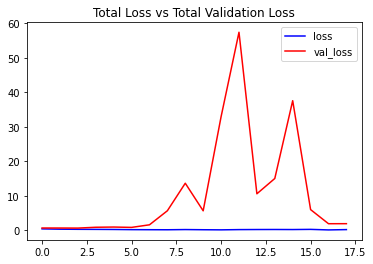

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

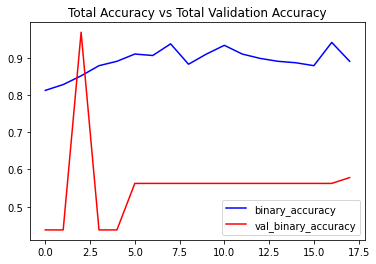

In [ ]:
plot_metric('binary_accuracy', 'val_binary_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
def make_average_predictions(video_file_path, predictions_frames_count):
    
    # Initializing the Numpy array which will store Prediction Probabilities
    predicted_labels_probabilities_np = np.zeros((predictions_frames_count, model_output_size), dtype = np.float)

    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)

    # Getting The Total Frames present in the video 
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculating The Number of Frames to skip Before reading a frame
    skip_frames_window = video_frames_count // predictions_frames_count

    for frame_counter in range(predictions_frames_count): 

        # Setting Frame Position
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading The Frame
        _ , frame = video_reader.read() 

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255

        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]

        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_np[frame_counter] = predicted_labels_probabilities

    # Calculating Average of Predicted Labels Probabilities Column Wise 
    predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)

    # Sorting the Averaged Predicted Labels Probabilities
    predicted_labels_probabilities_averaged_sorted_indexes = np.argsort(predicted_labels_probabilities_averaged)[::-1]

    # Iterating Over All Averaged Predicted Label Probabilities
    for predicted_label in predicted_labels_probabilities_averaged_sorted_indexes:

        # Accessing The Class Name using predicted label.
        predicted_class_name = classes_list[predicted_label]

        # Accessing The Averaged Probability using predicted label.
        predicted_probability = predicted_labels_probabilities_averaged[predicted_label]

        print(f"CLASS NAME: {predicted_class_name}   AVERAGED PROBABILITY: {(predicted_probability*100):.2}")
        print(predicted_probability)
    
    # Closing the VideoCapture Object and releasing all resources held by it. 
    video_reader.release()

In [ ]:
make_average_predictions('/content/Dribble - 13_Trim.mp4', 5)

CLASS NAME: Shot   AVERAGED PROBABILITY: 6.2e+01
0.6179165601730346
CLASS NAME: Dribble   AVERAGED PROBABILITY: 3.8e+01
0.38208346962928774


In [ ]:
make_average_predictions('/content/Shooting - 1_Trim.mp4', 50)

CLASS NAME: Shot   AVERAGED PROBABILITY: 6.3e+01
0.6324053037166596
CLASS NAME: Dribble   AVERAGED PROBABILITY: 3.7e+01
0.3675946992635727


In [ ]:
make_average_predictions('/content/Dribble - 19_Trim.mp4', 50)

CLASS NAME: Shot   AVERAGED PROBABILITY: 6.3e+01
0.6270344436168671
CLASS NAME: Dribble   AVERAGED PROBABILITY: 3.7e+01
0.3729655557870865


In [ ]:
make_average_predictions('/content/Shooting - 8_Trim.mp4', 50)

CLASS NAME: Shot   AVERAGED PROBABILITY: 6.3e+01
0.6332445323467255
CLASS NAME: Dribble   AVERAGED PROBABILITY: 3.7e+01
0.3667554646730423


In [ ]:
model.save('single_frame_basketball_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('single_frame_basketball_model.h5')

In [ ]:
make_average_predictions('/content/Layup - 2_Trim.mp4', 50)

CLASS NAME: Shot   AVERAGED PROBABILITY: 6.2e+01
0.6187586987018585
CLASS NAME: Dribble   AVERAGED PROBABILITY: 3.8e+01
0.3812413018941879
